In [1]:
#importing spacy and loading the model
import spacy
nlp = spacy.load('en_core_web_md')

In [2]:
#using pandas to read csv
import pandas as pd
df = pd.read_csv('text.csv')

print(df.head())

   id                                               para
0   1  Until recently, the conventional wisdom was th...
1   2  This mindset can create new opportunities for ...
2   3  Elon Musk has finally unveiled a prototype of ...
3   4  While the sort of new HomePod grabbed all the ...


In [3]:
#Splitting paragraph into sentences
paragraph=df.para[0]

processed_para=nlp(paragraph) #processed_para is a spacy doc object
# print(processed_para.sents)

sentences=[]
for i,sent in enumerate(processed_para.sents):
    print("{0} : {1}".format(i,sent))
    sentences.append(sent)

sentence=str(sentences[0]) #converting spacy span object to string
print('\n'+sentence)


0 : Until recently, the conventional wisdom was that while AI was better than humans at data-driven decision making tasks, it was still inferior to humans for cognitive and creative ones.
1 : But in the past two years language-based AI has advanced by leaps and bounds, changing common notions of what this technology can do.
2 : The most visible advances have been in natural language processing (NLP), the branch of AI focused on how computers can process language like humans do.
3 : It has been used to write an article for The Guardian, and AI-authored blog posts have gone viral — feats that were not possible a few years ago.
4 : AI even excels at cognitive tasks like programming where it is able to generate programs for simple video games from human instructions.

Until recently, the conventional wisdom was that while AI was better than humans at data-driven decision making tasks, it was still inferior to humans for cognitive and creative ones.


In [4]:
#Tokenisation
doc = nlp(sentence)

for token in doc:
    print("{0}\t{1}".format(token.text,token.idx)) 
    #idx property gives index of word in sentence

Until	0
recently	6
,	14
the	16
conventional	20
wisdom	33
was	40
that	44
while	49
AI	55
was	58
better	62
than	69
humans	74
at	81
data	84
-	88
driven	89
decision	96
making	105
tasks	112
,	117
it	119
was	122
still	126
inferior	132
to	141
humans	144
for	151
cognitive	155
and	165
creative	169
ones	178
.	182


In [5]:
#How are tokens encoded in spacy?
print(doc.vocab.strings) #uses a hashmap to store strings
print(doc.vocab.strings['creative']) #convert string to hash
nlp.vocab.strings[1433653077910583464] #convert hash to string


1433653077910583464


'creative'

In [6]:
#Token attributes and Part-of-speech tagging
for token in doc:
    print("{0} \tPOS:{1} \nDescription: {2}\n".format(token,token.pos_,spacy.explain(token.tag_)))


Until 	POS:ADP 
Description: conjunction, subordinating or preposition

recently 	POS:ADV 
Description: adverb

, 	POS:PUNCT 
Description: punctuation mark, comma

the 	POS:DET 
Description: determiner

conventional 	POS:ADJ 
Description: adjective (English), other noun-modifier (Chinese)

wisdom 	POS:NOUN 
Description: noun, singular or mass

was 	POS:AUX 
Description: verb, past tense

that 	POS:SCONJ 
Description: conjunction, subordinating or preposition

while 	POS:SCONJ 
Description: conjunction, subordinating or preposition

AI 	POS:PROPN 
Description: noun, proper singular

was 	POS:AUX 
Description: verb, past tense

better 	POS:ADJ 
Description: adjective, comparative

than 	POS:ADP 
Description: conjunction, subordinating or preposition

humans 	POS:NOUN 
Description: noun, plural

at 	POS:ADP 
Description: conjunction, subordinating or preposition

data 	POS:NOUN 
Description: noun, singular or mass

- 	POS:PUNCT 
Description: punctuation mark, hyphen

driven 	POS:VERB 
Des

In [7]:
#Named entity recogntion
for entity in doc.ents:
    print("{0}    \t{1}\nDescription: {2}\n".format(entity.text,entity.label_,spacy.explain(entity.label_)))

AI    	ORG
Description: Companies, agencies, institutions, etc.



In [8]:
from spacy import displacy
displacy.render(doc,style='ent',jupyter=True)

In [9]:
#Stop word removal
for token in doc: #displaying stop words
    if token.is_stop:
        print(token)

new_doc=[token for token in doc if not token.is_stop] #removing stop words
print(new_doc)

Until
the
was
that
while
was
than
at
it
was
still
to
for
and
[recently, ,, conventional, wisdom, AI, better, humans, data, -, driven, decision, making, tasks, ,, inferior, humans, cognitive, creative, ones, .]


In [10]:
#Removing punctuation
new_doc=[str(token).strip() for token in doc if not token.is_punct] #filtering punctuation and stripping words
print(new_doc)

['Until', 'recently', 'the', 'conventional', 'wisdom', 'was', 'that', 'while', 'AI', 'was', 'better', 'than', 'humans', 'at', 'data', 'driven', 'decision', 'making', 'tasks', 'it', 'was', 'still', 'inferior', 'to', 'humans', 'for', 'cognitive', 'and', 'creative', 'ones']


In [11]:
#Lemmatisation
new_doc=[token.lemma_ for token in doc] #lemmatisation
print(new_doc)

['until', 'recently', ',', 'the', 'conventional', 'wisdom', 'be', 'that', 'while', 'AI', 'be', 'well', 'than', 'human', 'at', 'data', '-', 'drive', 'decision', 'make', 'task', ',', 'it', 'be', 'still', 'inferior', 'to', 'human', 'for', 'cognitive', 'and', 'creative', 'one', '.']


In [12]:
#Visualising dependencies
displacy.render(doc, style='dep', jupyter = True)


In [13]:
#Frequency analysis
from collections import Counter
words=[word.text for word in nlp(df.para[3])]
common=Counter(words).most_common(5) #returns top 5 most common words
print(common)


[('the', 16), ('to', 12), ('.', 11), (',', 10), ('new', 9)]


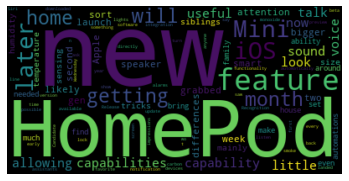

In [17]:
#Generating a wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

joined_text = " ".join(token for token in words)
# print(joined_text)
wordcloud = WordCloud().generate(joined_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud.png')
plt.show()

In [15]:
#Multiprocessing with spacy
texts=df.para.tolist() #converting dataframe to list
docs = nlp.pipe(texts, n_process=4) #using 4 processes to process texts

for doc in docs:
    print(doc)

Until recently, the conventional wisdom was that while AI was better than humans at data-driven decision making tasks, it was still inferior to humans for cognitive and creative ones. But in the past two years language-based AI has advanced by leaps and bounds, changing common notions of what this technology can do. The most visible advances have been in natural language processing (NLP), the branch of AI focused on how computers can process language like humans do. It has been used to write an article for The Guardian, and AI-authored blog posts have gone viral — feats that were not possible a few years ago. AI even excels at cognitive tasks like programming where it is able to generate programs for simple video games from human instructions.
This mindset can create new opportunities for businesses as well — but shifting needs and priorities can also bring new risks. What can retailers do to attract consumers in this critical time of the year, as people rethink their goals and chart a

In [16]:
#Bonus
#Concept analysis library (Senticnet)
from senticnet.senticnet import SenticNet
sn = SenticNet()

for token in doc:
    try:
        if token.pos_ == 'ADJ':
            print("\n{0}".format(token.text))
            print(sn.concept(token.text))
    except:
        pass



new
{'polarity_label': 'positive', 'polarity_value': '0.9', 'sentics': {'introspection': '0.9', 'temper': '0', 'attitude': '0', 'sensitivity': '0'}, 'moodtags': ['#joy', '#joy'], 'semantics': ['good', 'cool', 'good_feeling', 'awesome', 'great']}

new
{'polarity_label': 'positive', 'polarity_value': '0.9', 'sentics': {'introspection': '0.9', 'temper': '0', 'attitude': '0', 'sensitivity': '0'}, 'moodtags': ['#joy', '#joy'], 'semantics': ['good', 'cool', 'good_feeling', 'awesome', 'great']}

same

smart
{'polarity_label': 'positive', 'polarity_value': '0.921', 'sentics': {'introspection': '0.995', 'temper': '0.801', 'attitude': '0', 'sensitivity': '0.968'}, 'moodtags': ['#joy', '#eagerness'], 'semantics': ['acquire_knowledge', 'comprehend', 'great', 'accumulate_knowledge', 'increase_knowledge']}

new
{'polarity_label': 'positive', 'polarity_value': '0.9', 'sentics': {'introspection': '0.9', 'temper': '0', 'attitude': '0', 'sensitivity': '0'}, 'moodtags': ['#joy', '#joy'], 'semantics': ['